<a href="https://colab.research.google.com/github/EslamElsolia5/ML-Projects/blob/main/Pd_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's disease classification
___
By 'Eslam'

In [ ]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2
# !pip install xgboost

### 1- Importing Libaries
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

###2- Reading data
---

In [ ]:
# Let us take a look at Parkinson's disease data
# -----------------------------------------------
df = pd.read_csv('/content/pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


###3- Information about data
---

In [ ]:
df.shape

(756, 755)

"df.info()" function has the ability to show the information about only first 100 columns in the kernel, but we have 755 columns. So we used for loop to show the information about all columns in our dataset.

In [ ]:
for i in range(0,df.shape[1], 20):
  print(df[df.columns[i : i+20]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  756 non-null    int64  
 1   gender              756 non-null    int64  
 2   PPE                 756 non-null    float64
 3   DFA                 756 non-null    float64
 4   RPDE                755 non-null    float64
 5   numPulses           755 non-null    float64
 6   numPeriodsPulses    755 non-null    float64
 7   meanPeriodPulses    755 non-null    float64
 8   stdDevPeriodPulses  755 non-null    float64
 9   locPctJitter        755 non-null    float64
 10  locAbsJitter        754 non-null    float64
 11  rapJitter           755 non-null    float64
 12  ppq5Jitter          754 non-null    float64
 13  ddpJitter           755 non-null    float64
 14  locShimmer          755 non-null    float64
 15  locDbShimmer        755 non-null    object 
 16  apq3Shim

###4- Cleaning data
---

In [ ]:
# Dealing with Null Values
# --------------------------------
dict_nulls = dict(df.isna().sum()) # Pandas Series to Dictionary

# Display only columns that have null values
existed_nulls = {i:dict_nulls[i] for i in dict_nulls if dict_nulls[i] > 0}
len(existed_nulls) # We have 195 columns with null values out of 755 columns

195

**Let's sorting the columns that contain null values ​​to deal with them.**

In [ ]:
# Sorting the values in the dictionary
# -------------------------------------
sorted_nulls = dict(sorted(existed_nulls.items(), key = lambda x : x[1], reverse = True))
sorted_nulls

{'det_LT_TKEO_std_6_coef': 534,
 'locAbsJitter': 2,
 'ppq5Jitter': 2,
 'meanNoiseToHarmHarmonicity': 2,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_energy': 2,
 'mean_MFCC_0th_coef': 2,
 'mean_MFCC_1st_coef': 2,
 'mean_MFCC_2nd_coef': 2,
 'mean_MFCC_3rd_coef': 2,
 'mean_MFCC_4th_coef': 2,
 'mean_MFCC_5th_coef': 2,
 'mean_MFCC_6th_coef': 2,
 'mean_MFCC_7th_coef': 2,
 'mean_MFCC_8th_coef': 2,
 'mean_MFCC_9th_coef': 2,
 'mean_MFCC_10th_coef': 2,
 'mean_MFCC_11th_coef': 2,
 'mean_MFCC_12th_coef': 2,
 'mean_delta_log_energy': 2,
 'mean_0th_delta': 2,
 'mean_1st_delta': 2,
 'mean_2nd_delta': 2,
 'mean_3rd_delta': 2,
 'mean_4th_delta': 2,
 'mean_5th_delta': 2,
 'mean_6th_delta': 2,
 'mean_7th_delta': 2,
 'mean_8th_delta': 2,
 'mean_9th_delta': 2,
 'mean_10th_delta': 2,
 

Here, we discovered that the 'det_LT_TKEO_std_6_coef' column contains the largest number of missing values.

In [ ]:
# Drop this column because it contains the large number of missing values
df.drop(["det_LT_TKEO_std_6_coef"], axis = 1, inplace = True)

In [ ]:
# Checking the number of nulls in each row
# ------------------------------------------
# If the number of nulls in a certain row is very large, it should delete this row.
nulls_row = dict(df.isna().sum(axis=1))
existed_nulls_row = {i : nulls_row[i] for i in nulls_row if nulls_row[i] > 0}
existed_nulls_row

{22: 1, 45: 1, 82: 1, 152: 193, 220: 155}

In [ ]:
# Sorting the values in the dictionary
nulls_row = dict(sorted(existed_nulls_row.items(), key = lambda x : x[1], reverse = True))
df.drop([152, 220], axis = 0, inplace = True) # Delete rows that contains a lot of nulls.

In [ ]:
dict_nulls = dict(df.isna().sum())
existed_nulls = {i:dict_nulls[i] for i in dict_nulls if dict_nulls[i] > 0}
existed_nulls

{'locAbsJitter': 1, 'ppq5Jitter': 1, 'meanNoiseToHarmHarmonicity': 1}

In [ ]:
# Dealing with missing remaining values
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop("id", axis=1, inplace=True)

We will check whether there are still any missing values in the columns or rows.

In [ ]:
# for columns
# -----------
dict_nulls = dict(df.isna().sum())
existed_nulls = {i:dict_nulls[i] for i in dict_nulls if dict_nulls[i] > 0}
existed_nulls

{}

In [ ]:
# For rows
# ---------
nulls_row = dict(df.isna().sum(axis = 1))
existed_nulls_row = {i:nulls_row[i] for i in nulls_row if nulls_row[i] > 0}
existed_nulls_row

{}

In [ ]:
df.shape

(751, 753)

#####2- Outliers

In [ ]:
# Dealing with outliers
# -----------------------------
# To deal with outliers we choose only the numericaL columns
outlier_stats = {}
for col in df.select_dtypes(include=['float', 'int']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_percentage = num_outliers / len(df) * 100
    outlier_stats[col] = outlier_percentage
outlier_stats
sorted_outliers = sorted(outlier_stats.items(), key=lambda x: x[1], reverse=True)
print("Top columns with the highest percentage of outliers:")
for col, percentage in sorted_outliers[:3]:  # Visualize the most 3 columns have outliers
    print(f"{col}: {percentage:.2f}%")

Top columns with the highest percentage of outliers:
tqwt_medianValue_dec_26: 39.15%
tqwt_skewnessValue_dec_26: 39.15%
tqwt_skewnessValue_dec_21: 35.82%


Visualize the first 3 columns that have the largest outliers.

<Axes: >

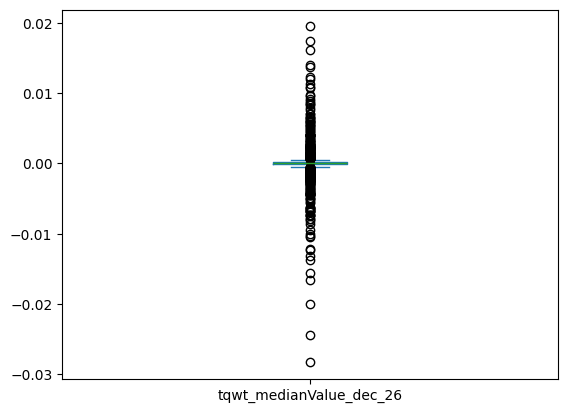

In [ ]:
df["tqwt_medianValue_dec_26"].plot(kind = "box")

<Axes: >

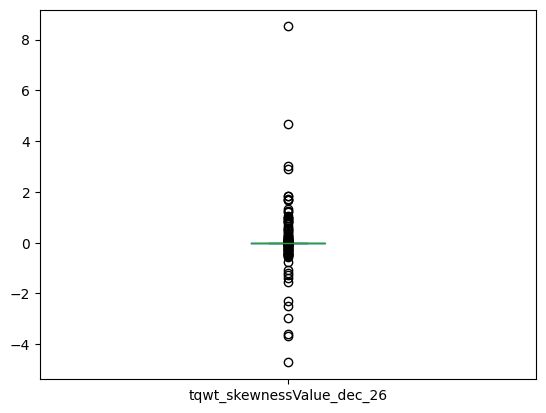

In [ ]:
df["tqwt_skewnessValue_dec_26"].plot(kind = "box")

<Axes: >

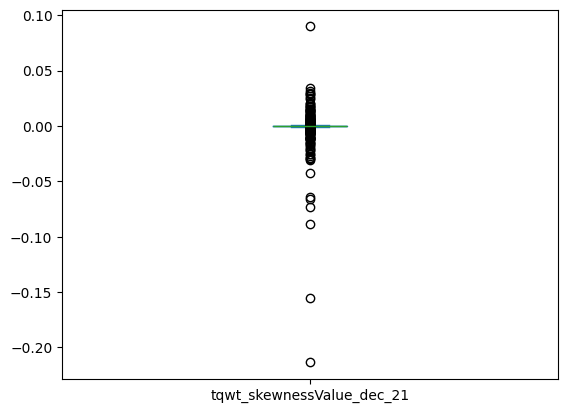

In [ ]:
df["tqwt_skewnessValue_dec_21"].plot(kind = "box")

We will handle this amount of outliers later using standardization before creating the model.

###5- Data Visualization
---

In [ ]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
# KDE Plot to show the density of each value for columns
# --------------------------------------------------------
"""
We will create a function to visualize our data using KDE plot
func_name => KPlot
Parameters => feature : The column we want to visualize
We will call the KDE plot using seaborn library

"""
def KPlot(feature):
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.kdeplot(data = df[feature], fill = True)

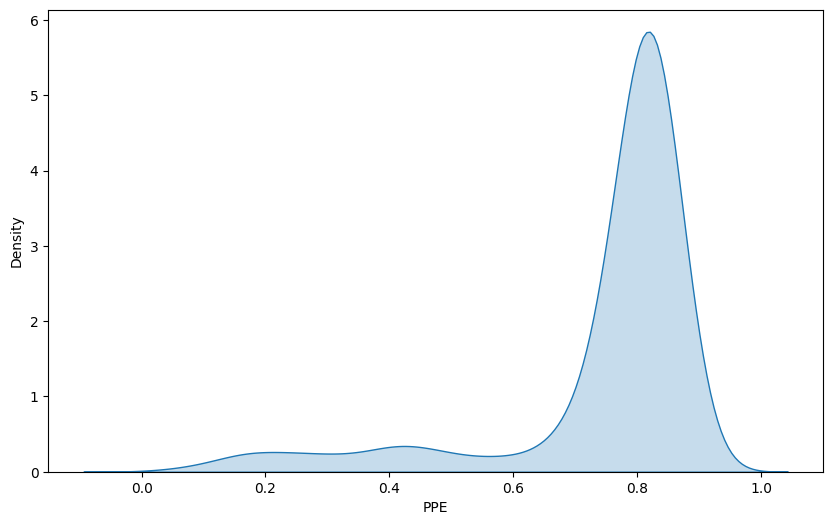

In [ ]:
KPlot("PPE")

We notice that the highest density of values for the PPE column is approximately between 0.7 and 0.9.

In [ ]:
#  Let's visualize the two columns to show the relationship between them using KDE plot
# --------------------------------------------------------------------------------------
"""
This function will visualize the relationship between the first feature and the values of the second feature
to show whether there is a difference in these distributions.
func_name => KPlot
parameters => first_feature : the first feature to visualize it in own subplot to show its distribution
              second_feature : we use its values to visualize the relationship between the first feature
                               In each subplot separately
              title1 : the title of subplot 2
              title2 : the title of subplot 3
              FirstValue : the first value of the second feature
              SecondValue : the second value of the second feature

"""
def KPlot(first_feature, title1, title2, second_feature, FirstValue, SecondValue):

  fig, ax = plt.subplots(figsize = (20, 6))
  plt.subplot(1,3,1)
  plt.title(f"-{first_feature}-")
  sns.kdeplot(data = df[first_feature], fill = True)
  plt.subplot(1,3,2)
  plt.title(f"-{title1}-")
  sns.kdeplot(data = df[df[second_feature] == FirstValue][first_feature], fill = True)
  plt.subplot(1,3,3)
  plt.title(f"-{title2}-")
  sns.kdeplot(data = df[df[second_feature] == SecondValue][first_feature],fill = True)

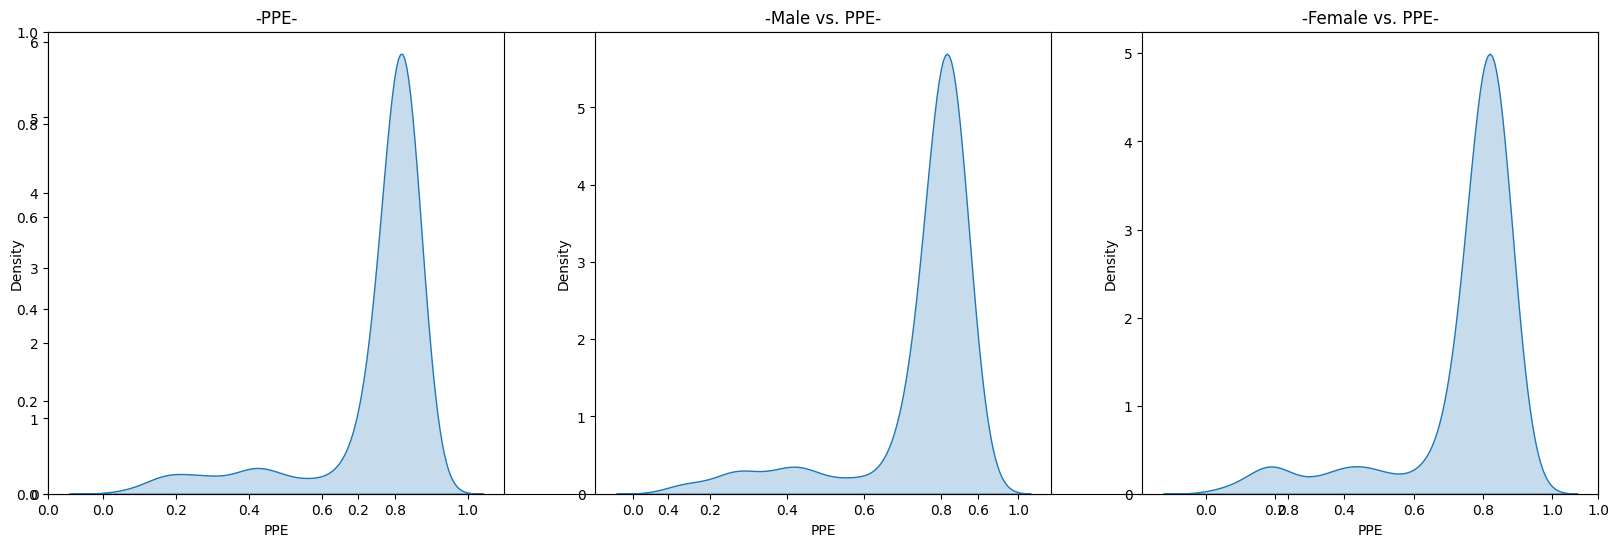

In [ ]:
KPlot("PPE","Male vs. PPE", "Female vs. PPE", "gender", 1, 0)

Here, there is almost no difference in the shape of the three distributions, the highest density of values for the PPE column in these distribution from 0.7 to 0.9.

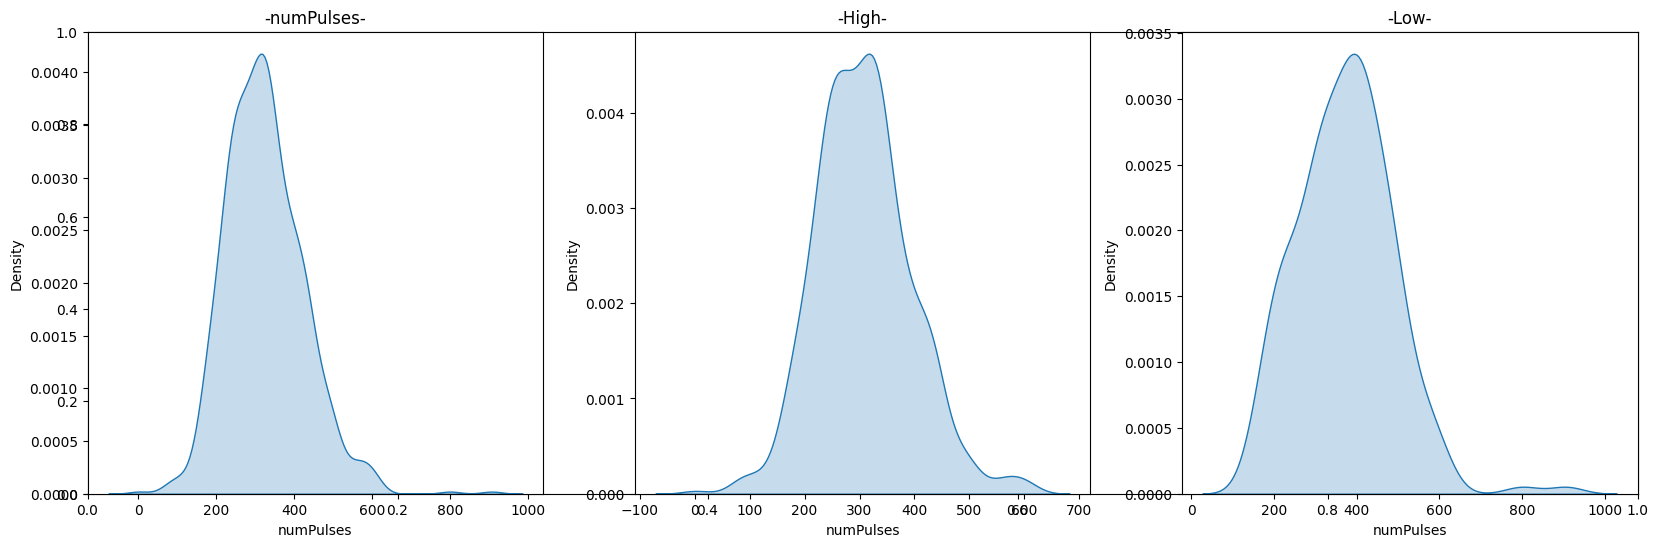

In [ ]:
KPlot("numPulses", "High", "Low", "class", 1, 0)

Here, there is almost no difference in the shape of the first two distributions when the class is 1 (PD is existed), where the highest density of number of pulses values from 250 to 350 pulse.
When the class is 0 (PD is not existed) the highest density of number of pulses values from 180 to 220 and from 380 to 420.

In [ ]:
# Box Plot
# ----------
"""

We will create the box plot to show the median, Q1, Q3, and outlier of our features
func_name => BPlot
parameters => feature1
              feature2 : the default value is None incase of we wanted visualize one feature
              hue_col : the default value is None incase of we wanted visualize only two features not three
"""
def BPlot(feature1,feature2 = None,hue_col = None) :
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue_col == None :
        sns.boxplot(df[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue_col == None :
        sns.boxplot(x = df[feature1],y=df[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue_col != None :
        sns.boxplot(x = df[feature1],y=df[feature2],hue=df[hue_col],width=0.3,color='r')

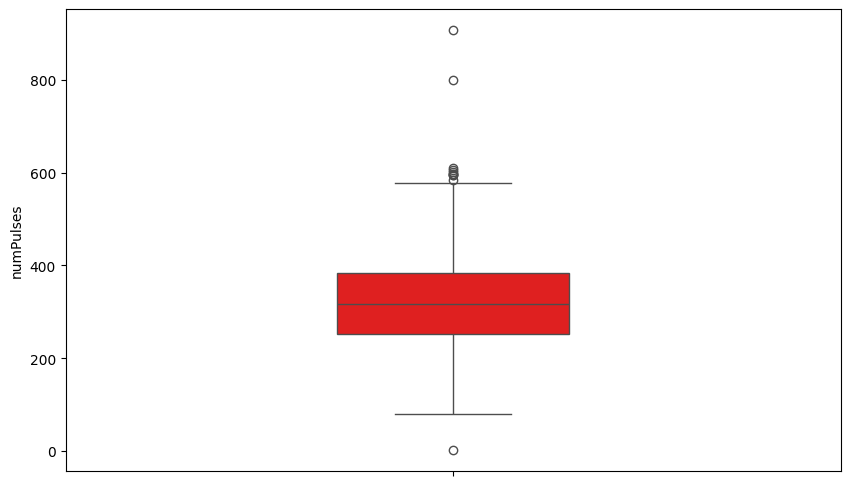

In [ ]:
BPlot("numPulses")

We notice that the median of number of pulses is 300 and there are values far away from this median where its values are less than 100 and larger that 500 pulses.

**Let's visualize the categorical features**

<Axes: xlabel='gender', ylabel='numPulses'>

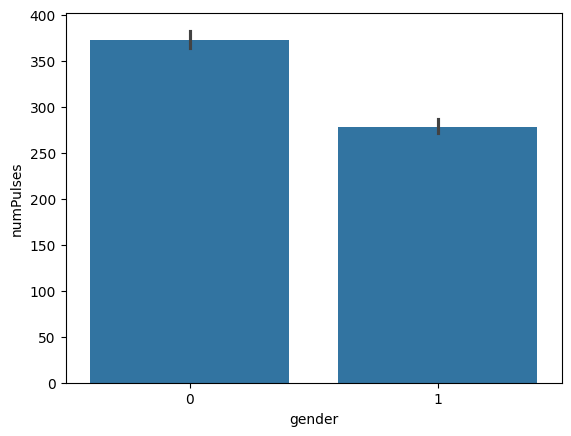

In [ ]:
# Bar plot
# ----------
sns.barplot(x = "gender", y = "numPulses", data = df)

We notice that number of pulses of 0 (female) is larger than number of pulses of 1 (male).

In [ ]:
# Pie Chart
# -----------
"""
We will create a Pie Chart to visualze the ratio of each class in a column.
func_name => Pie
parameters => feature : to visualize it
              limit : (default = 10) to represent maximum number of categories to display in the pie chart.
"""
def Pie(feature,Limit=10) :
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(df[feature].value_counts().iloc[:Limit],labels=list(df[feature].value_counts().iloc[:Limit].index),
            autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(df[feature].value_counts().iloc[:Limit]))] )
    plt.show()

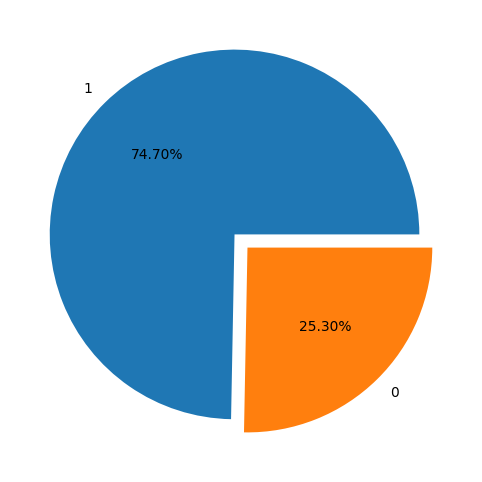

In [ ]:
Pie("class")

###6- Feature Selection
---

**We will select the best 100 features from our dataset.**

In [ ]:
# Choose the features and the target
# -----------------------------------
X = df.drop("class", axis = 1)
y = df["class"]

# The features type must be numerical to select.
df.select_dtypes(include = ["object"]).columns # Showing the the columns have the object type

Index(['locDbShimmer', 'maxIntensity'], dtype='object')

In [ ]:
# We will convert the values of two columns to float type
# --------------------------------------------------------
for i in df["locDbShimmer"].tolist():
  try:
    float(i)
  except:
    print(i) # 1.13#4

for i in df["maxIntensity"].tolist():
  try:
    float(i)
  except:
    print(i) # 66.13744a406

1.13#4
66.13744a406


Two values "1.13#4" and "66.13744a406" made the type of two features are object not float, So we must modify these two values so that the type of two features become float type.

In [ ]:
df["locDbShimmer"] = df["locDbShimmer"].replace("1.13#4", "1.134")
df["maxIntensity"] = df["maxIntensity"].replace("66.13744a406", "66.13744406")

In [ ]:
# Convert the types of the two features into float
# -------------------------------------------------
df["locDbShimmer"] = df["locDbShimmer"].astype(float)
df["maxIntensity"] = df["maxIntensity"].astype(float)

In [ ]:
# Check if there are still features of type "object" or not.
df.select_dtypes(include = ["object"]).columns

Index([], dtype='object')

In [ ]:
# Again choose the features and the target
# -----------------------------------------
X = df.drop("class", axis = 1)
y = df["class"]

# Choose the best 200 features
# -----------------------------------------
featureSelection = SelectKBest(score_func = f_classif, k = 200)
X_Selected = featureSelection.fit_transform(X, y)
# New dataframe after selecting using kbest
df_new = pd.DataFrame(X_Selected, columns = X.columns[featureSelection.get_support()])
df_new.head()

,DFA,RPDE,numPulses,numPeriodsPulses,apq11Shimmer,minIntensity,maxIntensity,meanIntensity,f1,f2,...,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_maxValue_dec_15,tqwt_maxValue_dec_16,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.71826,0.57227,240.0,239.0,0.04828,69.997496,76.088046,72.465512,539.342735,1031.849040,...,0.048924,0.105750,0.20486,0.29603,2.1550,1.6058,1.5466,1.5620,3.0004,18.9405
1,0.69481,0.53966,234.0,233.0,0.06195,67.415903,73.046374,71.528945,564.363615,1016.367294,...,0.112210,0.121580,0.18155,0.25945,2.2061,1.5772,1.5530,1.5589,6.3431,45.1780
2,0.67604,0.58982,232.0,231.0,0.07772,62.661706,71.633549,68.086583,548.444604,1032.406341,...,0.039886,0.081818,0.17028,0.20036,2.0427,1.5921,1.5399,1.5643,3.1495,4.7666
3,0.79672,0.59257,178.0,177.0,0.04462,76.306989,81.000749,79.190593,819.529588,1201.813897,...,0.273530,0.567740,0.83417,0.94236,2.0362,1.8829,6.9761,3.7805,6.2650,4.0603
4,0.79782,0.53028,236.0,235.0,0.05278,76.645686,80.937258,79.183495,846.796144,1215.346469,...,0.235860,0.567490,0.74186,0.75783,2.1073,1.8821,7.8832,6.1727,5.0559,6.1164


###7- Building the Model
---

1- Splitting the data

In [ ]:
# Training set => 80% , Development set => 20% , Test set => 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

2- Scaling the data

In [ ]:
standardScaler = StandardScaler(copy = True)
X_train = standardScaler.fit_transform(X_train)
X_val = standardScaler.transform(X_val)
X_test = standardScaler.transform(X_test)

3- Building the Models

In [ ]:
models = [
    LogisticRegression(max_iter=1000, n_jobs=True),
    SGDClassifier(loss='log_loss', n_jobs=-1, random_state=42),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(criterion='entropy', max_depth= 15, splitter='best'),
    RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=110, n_jobs=-1),
    SVC(random_state=True),
    XGBClassifier(max_depth=15, n_estimators=280)
]

# Training this models
# ----------------------
for model in models:
    model.fit(X_train, y_train)
    # Accuracy in training and dev sets
    train_score = model.score(X_train, y_train)
    dev_score = model.score(X_val, y_val)
    test_score = model.score(X_test, y_test)

    # Finding the predicton o/p
    # --------------------------
    y_pred = model.predict(X_test)

    # Evaluating an each model
    # -------------------------
    print(f"For the - {model} - Model : ")
    print(f"The score for training set => {train_score}")
    print(f"The score for dev set => {dev_score}")
    print(f"The score for test set => {test_score}")
    print(f"The confusion matrix =>\n{confusion_matrix(y_test, y_pred)}")
    print(f"The classification report =>\n{classification_report(y_test, y_pred, zero_division = 1)}")
    print("="*100)

For the - LogisticRegression(max_iter=1000, n_jobs=True) - Model : 
The score for training set => 0.9291666666666667
The score for dev set => 0.8083333333333333
The score for test set => 0.8145695364238411
The confusion matrix =>
[[ 23  17]
 [ 11 100]]
The classification report =>
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        40
           1       0.85      0.90      0.88       111

    accuracy                           0.81       151
   macro avg       0.77      0.74      0.75       151
weighted avg       0.81      0.81      0.81       151

For the - SGDClassifier(loss='log_loss', n_jobs=-1, random_state=42) - Model : 
The score for training set => 0.9104166666666667
The score for dev set => 0.7916666666666666
The score for test set => 0.8145695364238411
The confusion matrix =>
[[28 12]
 [16 95]]
The classification report =>
              precision    recall  f1-score   support

           0       0.64      0.70      0.67   

***---From the results of evaluating each model, it appears that the best-performing model for predicting Parkinson's disease is the XGBClassifier model with an accuracy of 89%---.***

In [ ]:
y_pred = models[-1].predict(X_test)
print(y_pred)
print("==========================================================================")
print((y_test).values)

corrected_pred = []
for i,j in zip(y_test, y_pred):
  if i == j:
    corrected_pred.append("Correct")
  else:
    corrected_pred.append("Incorrect")
print(pd.Series(corrected_pred).value_counts())

[1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1]
[1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 1]
Correct      134
Incorrect     17
Name: count, dtype: int64
